In [1]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.7 MB/s eta 0:00:00


In [2]:
pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.2 MB/s eta 0:00:00


In [3]:
from google.colab import drive
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd
import pickle
import networkx as nx
import igraph as ig
import random
import matplotlib.pyplot as plt
import hdbscan
#gpu only
#import cuml
#from cuml.preprocessing import StandardScaler
#from cuml.decomposition import PCA
#from cuml.cluster import DBSCAN
#import cupy as cp
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/COMP 573_Anomaly Detection/Merged CSV/Merged_Data_Part0.csv'
data0 = pd.read_csv(file_path)

data0

,review_id,user_id,business_id,stars_x,useful_x,funny_x,cool_x,text,date,review_date,...,longitude,stars_y,review_count_y,is_open,attributes,categories,hours,category_count,average_rating,rating_std_dev_y
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018-07-07 22:09:11,...,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...",7,3.068571,1.544693
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012-01-03 15:28:18,...,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3...",5,4.748344,0.645172
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014-02-05 20:30:30,...,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",{},2,3.458333,1.543116
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015-01-04 00:01:03,...,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...",4,4.184211,1.218362
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017-01-14 20:54:15,...,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...",8,4.114286,1.254906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,2018-05-30 22:28:56,...,-86.200355,4.0,175,0,"{'RestaurantsTableService': 'True', 'OutdoorSe...","American (Traditional), Breakfast & Brunch, Re...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:0', '...",4,4.081967,1.230944
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52,2015-04-05 23:31:52,...,-75.318160,2.5,55,1,"{'GoodForKids': 'False', 'ByAppointmentOnly': ...","Yoga, Gyms, Trainers, Fitness & Instruction, A...","{'Monday': '0:0-0:0', 'Tuesday': '5:0-22:0', '...",6,2.228070,1.295839
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,2016-06-04 00:59:15,...,-75.541083,3.5,107,1,"{'NoiseLevel': ""u'quiet'"", 'RestaurantsTakeOut...","Mexican, Restaurants","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",2,3.765217,1.391266
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08,2018-06-11 12:45:08,...,-75.170899,4.0,618,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, American (New), Breakfast & Brunc...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:0', ...",4,4.247244,0.966459


In [7]:
print(data0.columns.tolist())

['review_id', 'user_id', 'business_id', 'stars_x', 'useful_x', 'funny_x', 'cool_x', 'text', 'date', 'review_date', 'text_length', 'day_of_week', 'review_age', 'review_burst_flag', 'name_x', 'review_count_x', 'yelping_since', 'useful_y', 'funny_y', 'cool_y', 'elite', 'friends', 'fans', 'average_stars_x', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos', 'elite_binary', 'elite_years', 'friends_count', 'average_stars_y', 'rating_std_dev_x', 'name_y', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count_y', 'is_open', 'attributes', 'categories', 'hours', 'category_count', 'average_rating', 'rating_std_dev_y']


In [6]:
folder_path = '/content/drive/My Drive/Colab Notebooks/COMP 573_Anomaly Detection/Step_23 (1)/'

# File paths
bipartite_graph_path = folder_path + 'bipartite_graph (1).pkl'
business_graph_path = folder_path + 'business_graph (1).pkl'
user_graph_path = folder_path + 'user_graph (1).pkl'
embedding_path = folder_path + 'graphsage_embeddings (1).csv'

# Load graphs
with open(bipartite_graph_path, 'rb') as f:
    bipartite_graph = pickle.load(f)

with open(business_graph_path, 'rb') as f:
    business_graph = pickle.load(f)

with open(user_graph_path, 'rb') as f:
    user_graph = pickle.load(f)

# Check basic graph info
print(f"Bipartite Graph: {bipartite_graph.number_of_nodes()} nodes, {bipartite_graph.number_of_edges()} edges")
print(f"Business Graph: {business_graph.number_of_nodes()} nodes, {business_graph.number_of_edges()} edges")
print(f"User Graph: {user_graph.number_of_nodes()} nodes, {user_graph.number_of_edges()} edges")

# Load embeddings
embeddings = pd.read_csv(embedding_path)
# Preview the embeddings
embeddings

Bipartite Graph: 89302 nodes, 99197 edges
Business Graph: 6531 nodes, 42364 edges
User Graph: 77604 nodes, 3437368 edges


,node,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,b_--ZVrH2X2QXBFdCilbirsw,-0.000648,0.001064,-0.000561,-0.000784,0.000910,0.000371,0.000336,0.000547,-0.000574,...,0.000710,-0.000021,0.000583,0.000975,0.001002,0.000413,0.001002,0.000241,-0.001231,-0.000287
1,b_--_9CAxgfXZmoFdNIRrhHA,-0.000506,0.000969,0.000382,0.000063,0.000672,0.000096,0.000266,0.000245,-0.000562,...,0.000053,-0.000166,0.000236,0.000505,0.000845,0.000135,0.000860,-0.000152,-0.000813,-0.000278
2,b_-02xFuruu85XmDn2xiynJw,-0.000645,0.001038,-0.000426,-0.000669,0.000920,0.000307,0.000284,0.000559,-0.000539,...,0.000634,-0.000019,0.000523,0.000948,0.000941,0.000405,0.000964,0.000149,-0.001200,-0.000203
3,b_-0Ym1Wg3bXd_TDz8JtvOQg,-0.000711,0.001010,-0.000398,-0.000623,0.000933,0.000272,0.000231,0.000586,-0.000509,...,0.000596,0.000025,0.000473,0.000914,0.000853,0.000458,0.000926,0.000184,-0.001210,-0.000172
4,b_-0fvhILrC9UsQ6gLNpZlTQ,-0.000734,0.001005,-0.000431,-0.000613,0.000900,0.000260,0.000254,0.000575,-0.000555,...,0.000605,0.000042,0.000477,0.000929,0.000865,0.000419,0.000933,0.000226,-0.001174,-0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89313,u_zzljYL9c22HWRO3VvJ1_Pg,-0.000625,0.000901,-0.000088,-0.000467,0.000904,0.000419,0.000370,0.000804,-0.000566,...,0.000520,-0.000071,0.000324,0.000769,0.000931,0.000279,0.000939,0.000254,-0.000944,0.000113
89314,u_zzsPf8xNW11nd0B6MZqfRw,-0.000604,0.000943,-0.000159,-0.000569,0.000941,0.000465,0.000403,0.000816,-0.000600,...,0.000556,-0.000091,0.000374,0.000811,0.000988,0.000306,0.000958,0.000291,-0.000931,0.000107
89315,u_zzsqjDvanJhH9tn8NautOQ,-0.000609,0.000979,-0.000198,-0.000617,0.000939,0.000497,0.000427,0.000814,-0.000617,...,0.000561,-0.000079,0.000410,0.000823,0.001006,0.000315,0.000955,0.000335,-0.000913,0.000080
89316,u_zztkCqqgR6VntYbqio4UTQ,-0.000598,0.000952,-0.000225,-0.000636,0.000948,0.000483,0.000426,0.000792,-0.000651,...,0.000578,-0.000093,0.000413,0.000829,0.001021,0.000327,0.000945,0.000330,-0.000897,0.000081


# Graph-Based Anomaly Detection

## DBSCAN

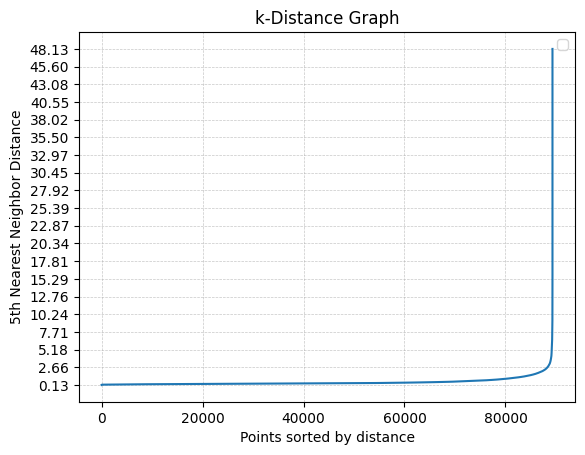

In [ ]:
nbrs = NearestNeighbors(n_neighbors=6).fit(reduced_embeddings.get())
distances, indices = nbrs.kneighbors(reduced_embeddings.get())
k_distances = np.sort(distances[:, -1])  # Get the distances to the 6th nearest neighbor

# Plot the distances
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.yticks(np.linspace(k_distances.min(), k_distances.max(), 20))
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()
plt.title('k-Distance Graph')
plt.show()

In [ ]:

# Load embeddings
embeddings = pd.read_csv(embedding_path)

# Step 1: Extract node IDs and embeddings
node_ids = embeddings['node']  # Save node IDs for later
embeddings.iloc[:, 1:] *= 1e2  # Scale the embeddings
embedding_values = embeddings.iloc[:, 1:].values  # Extract embedding values

# Step 2: Convert embeddings to CuPy array and standardize them
embedding_values_gpu = cp.array(embedding_values, dtype=cp.float64)  # Ensure float64
scaler = StandardScaler()
standardized_embeddings = scaler.fit_transform(embedding_values_gpu)

# Step 3: Apply PCA for dimensionality reduction
pca = PCA(n_components=5, random_state=42)
#After fine-tuning based on pca variance ratio, we are set with components 5-10
print(pca.explained_variance_ratio_)
reduced_embeddings = pca.fit_transform(standardized_embeddings)
print(pca.explained_variance_ratio_.cumsum())

# Step 4: Run DBSCAN on the reduced data in chunks
chunk_size = 24043  # Based on the warning batch size
num_chunks = len(reduced_embeddings) // chunk_size + 1
all_labels = []

for i in range(num_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, len(reduced_embeddings))
    chunk = reduced_embeddings[start:end]

    # Run DBSCAN on each chunk
    dbscan = DBSCAN(eps=2.5, min_samples=6, metric='euclidean')
    labels_chunk = dbscan.fit_predict(chunk)

    # Collect labels
    all_labels.extend(cp.asnumpy(labels_chunk).astype(cp.int64))

# Step 5: Add cluster labels back to the dataframe
embeddings['cluster'] = all_labels

# Step 6: Save the results
embeddings.to_csv('dbscan_clusters.csv', index=False)

# Step 7: Analyze results
print("Number of clusters (excluding noise):", len(set(all_labels) - {-1}))
print("Number of noise points:", all_labels.count(-1))
print(embeddings.head())


None
[0.35963182 0.62916311 0.74961406 0.82182371 0.88859982]
Number of clusters (excluding noise): 13
Number of noise points: 951
                       node         0         1         2         3         4  \
0  b_--ZVrH2X2QXBFdCilbirsw -0.064830  0.106401 -0.056082 -0.078423  0.090951   
1  b_--_9CAxgfXZmoFdNIRrhHA -0.050586  0.096869  0.038158  0.006319  0.067228   
2  b_-02xFuruu85XmDn2xiynJw -0.064498  0.103827 -0.042647 -0.066897  0.091983   
3  b_-0Ym1Wg3bXd_TDz8JtvOQg -0.071106  0.100976 -0.039773 -0.062292  0.093311   
4  b_-0fvhILrC9UsQ6gLNpZlTQ -0.073420  0.100530 -0.043137 -0.061325  0.090007   

          5         6         7         8  ...        55        56        57  \
0  0.037071  0.033611  0.054695 -0.057446  ... -0.002141  0.058265  0.097490   
1  0.009634  0.026644  0.024490 -0.056231  ... -0.016568  0.023628  0.050538   
2  0.030717  0.028391  0.055870 -0.053873  ... -0.001898  0.052285  0.094758   
3  0.027166  0.023115  0.058603 -0.050899  ...  0.002522  0.04

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette = silhouette_score(reduced_embeddings.get(), all_labels)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: -0.18832372243698384


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(reduced_embeddings.get(), all_labels)
print(f"Davies-Bouldin Index: {dbi}")

Davies-Bouldin Index: 2.264468986907637


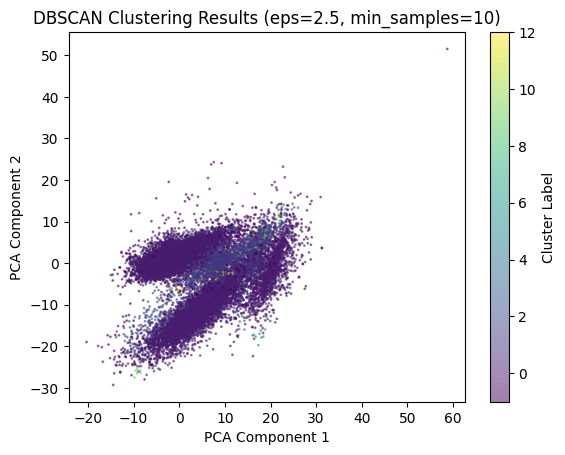

In [ ]:
# Visualize clustering results
plt.scatter(
    reduced_embeddings[:, 0].get(),
    reduced_embeddings[:, 1].get(),
    c=all_labels,
    cmap='viridis',
    s=1,
    alpha=0.5
)
plt.title("DBSCAN Clustering Results (eps=2.5, min_samples=10)")
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

After trying muliple combinations of parameter, it concludes that dbscan is not a good method for the dataset.

## HDBSCAN

Explained Variance Ratios: [0.35963182 0.26953129 0.12045095 0.07220965 0.06677611]
Cumulative Variance Ratios: [0.35963182 0.62916311 0.74961406 0.82182371 0.88859982]
Number of clusters (excluding noise): 8
Number of noise points: 3825
                       node         0         1         2         3         4  \
0  b_--ZVrH2X2QXBFdCilbirsw -0.000648  0.001064 -0.000561 -0.000784  0.000910   
1  b_--_9CAxgfXZmoFdNIRrhHA -0.000506  0.000969  0.000382  0.000063  0.000672   
2  b_-02xFuruu85XmDn2xiynJw -0.000645  0.001038 -0.000426 -0.000669  0.000920   
3  b_-0Ym1Wg3bXd_TDz8JtvOQg -0.000711  0.001010 -0.000398 -0.000623  0.000933   
4  b_-0fvhILrC9UsQ6gLNpZlTQ -0.000734  0.001005 -0.000431 -0.000613  0.000900   

          5         6         7         8  ...        55        56        57  \
0  0.000371  0.000336  0.000547 -0.000574  ... -0.000021  0.000583  0.000975   
1  0.000096  0.000266  0.000245 -0.000562  ... -0.000166  0.000236  0.000505   
2  0.000307  0.000284  0.000559 -0.

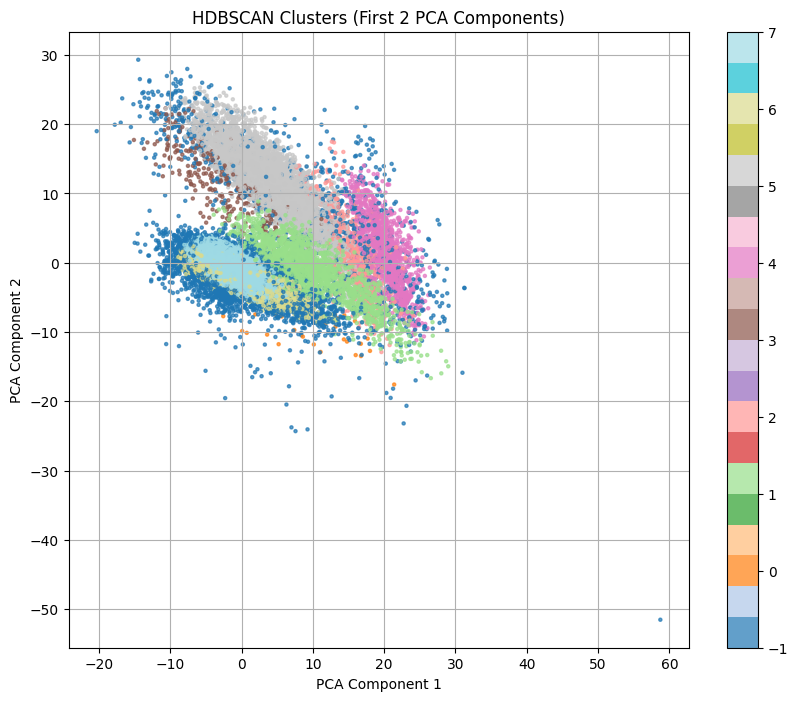

In [11]:
# Step 1: Extract node IDs and embeddings
node_ids = embeddings['node']  # Save node IDs for later
embedding_values = embeddings.iloc[:, 1:].values  # Extract embedding values

# Step 2: Standardize the embeddings using sklearn
scaler = StandardScaler()
standardized_embeddings = scaler.fit_transform(embedding_values)

# Step 3: Apply PCA for dimensionality reduction
pca = PCA(n_components=5, random_state=42)  # Adjust n_components based on PCA variance analysis
reduced_embeddings = pca.fit_transform(standardized_embeddings)

# Analyze PCA explained variance
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Cumulative Variance Ratios:", np.cumsum(pca.explained_variance_ratio_))

# Step 4: Run HDBSCAN
# Fine-tune `min_cluster_size` and `min_samples` based on your dataset
hdbscan_clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,  # Minimum size of clusters
    min_samples=5,        # Minimum samples for core points
    metric='euclidean',   # Distance metric
    cluster_selection_epsilon=0.0,  # Optional refinement
    prediction_data=True  # Required for cluster stability analysis
)

# Fit HDBSCAN
hdbscan_labels = hdbscan_clusterer.fit_predict(reduced_embeddings)

# Step 5: Add cluster labels back to the dataframe
embeddings['cluster'] = hdbscan_labels

# Step 6: Save the results
embeddings.to_csv('hdbscan_clusters.csv', index=False)

# Step 7: Analyze results
print("Number of clusters (excluding noise):", len(set(hdbscan_labels) - {-1}))
print("Number of noise points:", list(hdbscan_labels).count(-1))
print(embeddings.head())

# Step 8: Visualize the results (optional)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_embeddings[:, 0], reduced_embeddings[:, 1],
    c=hdbscan_labels, cmap='tab20', s=5, alpha=0.7
)
plt.colorbar(scatter)
plt.title("HDBSCAN Clusters (First 2 PCA Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()


In [12]:
# Filter out noise points (-1) for metric calculation
non_noise_points = hdbscan_labels != -1
filtered_embeddings = reduced_embeddings[non_noise_points]
filtered_labels = hdbscan_labels[non_noise_points]

# Calculate Silhouette Score (only if more than one cluster exists)
if len(set(filtered_labels)) > 1:
    silhouette = silhouette_score(filtered_embeddings, filtered_labels)
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette Score: Not applicable (only one cluster)")

# Calculate Davies-Bouldin Index (requires at least 2 clusters)
if len(set(filtered_labels)) > 1:
    davies_bouldin = davies_bouldin_score(filtered_embeddings, filtered_labels)
    print(f"Davies-Bouldin Index: {davies_bouldin}")
else:
    print("Davies-Bouldin Index: Not applicable (only one cluster)")


Silhouette Score: 0.4756306761557387
Davies-Bouldin Index: 0.826742446672078


In [13]:
# Extract anomalies (points labeled as -1 by HDBSCAN)
anomalies = embeddings[embeddings['cluster'] == -1]

# Save anomalies to a new CSV file
anomalies.to_csv('anomalies.csv', index=False)

In [23]:
print("Sample anomalies node values:")
print(anomalies['node'].head())

print("\nSample data0 review_id values:")
print(data0['review_id'].head())

Sample anomalies node values:
1     b_--_9CAxgfXZmoFdNIRrhHA
15    b_-4E0hSCldRJZLI-1cT38Sw
19    b_-5iuX3tPbwH5LpoWN9QhMQ
24    b_-6xYpkvG91ClVz31JjhJCA
31    b_-AhpS4MUSdYWg8SwZpV6eA
Name: node, dtype: object

Sample data0 review_id values:
0    KU_O5udG6zpxOg-VcAEodg
1    BiTunyQ73aT9WBnpR9DZGw
2    saUsX_uimxRlCVr67Z4Jig
3    AqPFMleE6RsU23_auESxiA
4    Sx8TMOWLNuJBWer-0pcmoA
Name: review_id, dtype: object


## Centrality Metrics

Centrality Metrics is not a good way to detect anomalies due to the size of our dataset. Degree centrality is on full graph but betweenness and eigenvector is only on sampling nodes.

In [17]:
## User Graph

# Step 1: Degree Centrality (Compute on Full Graph)
degree_centrality = nx.degree_centrality(user_graph)

# Step 2: Sample Nodes for Betweenness and Eigenvector Centrality
# Define a sampling strategy (e.g., top 10% of nodes by degree centrality)
sampled_nodes = list(degree_centrality.keys())[:1000]  # Sample the first 1000 nodes (adjust as needed)
subgraph = user_graph.subgraph(sampled_nodes)  # Induced subgraph with sampled nodes

# Step 3: Betweenness Centrality (Efficient Computation with iGraph)
# Convert the sampled NetworkX subgraph to iGraph
nx_sampled_graph = nx.convert_node_labels_to_integers(subgraph)  # Ensure compatibility with iGraph
edges = list(nx_sampled_graph.edges())
igraph_sampled_graph = ig.Graph(edges)

# Compute betweenness centrality on the sampled subgraph
betweenness = igraph_sampled_graph.betweenness(directed=False, weights=None)  # Normalized by default
betweenness_dict = {node: value for node, value in zip(subgraph.nodes(), betweenness)}

# Step 4: Eigenvector Centrality (Compute on Sampled Subgraph)
eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)

# Step 5: Combine Results into a DataFrame
# Ensure all centralities are computed on the same set of sampled nodes
centrality_df = pd.DataFrame({
    'node': list(subgraph.nodes()),
    'degree_centrality': [degree_centrality[node] for node in subgraph.nodes()],
    'betweenness_centrality': [betweenness_dict[node] for node in subgraph.nodes()],
    'eigenvector_centrality': [eigenvector_centrality[node] for node in subgraph.nodes()]
})

# Step 6: Save Centrality Results (optional)
centrality_df.to_csv('centrality_metrics_sampled.csv', index=False)

# Step 7: Analyze Influential Nodes
# Sort by degree centrality to find the most connected nodes
top_degree_nodes = centrality_df.sort_values(by='degree_centrality', ascending=False).head(10)
print("Top Nodes by Degree Centrality:")
print(top_degree_nodes)

# Sort by betweenness centrality to find influential intermediaries
top_betweenness_nodes = centrality_df.sort_values(by='betweenness_centrality', ascending=False).head(10)
print("\nTop Nodes by Betweenness Centrality:")
print(top_betweenness_nodes)

# Sort by eigenvector centrality to find influential nodes with influential neighbors
top_eigenvector_nodes = centrality_df.sort_values(by='eigenvector_centrality', ascending=False).head(10)
print("\nTop Nodes by Eigenvector Centrality:")
print(top_eigenvector_nodes)


Top Nodes by Degree Centrality:
                       node  degree_centrality  betweenness_centrality  \
668  _BcWyKQL16ndpBdggh2kNA           0.016340            24874.312274   
829  JRXbWVcU-uugX2DATU3nRA           0.013543             2734.887915   
348  OLGQ7alK4VKl3YdQk6UF5g           0.013350            39497.334193   
360  7M6eHyuAhtHl29H4HsgzBA           0.012796              626.382833   
106  z9uf9-0uX5Jh8-4Y5l2PQg           0.012306            19494.293679   
539  zQTEbn5nWGPypxOf2uRPmg           0.012255            34615.785169   
391  FXnHfE2PNKnc9zvkKkwDdQ           0.010657                0.000000   
34   nFqirXVrD9cykRoCekmOHg           0.010296             2565.149581   
911  y3Wtx1pOvTiqsJRkjceXiw           0.009781             3296.869458   
673  Jt3GylPuH64uA3zTdbMdCg           0.009342             3257.715385   

     eigenvector_centrality  
668            1.863987e-06  
829            3.772601e-04  
348            2.955455e-06  
360            9.404476e-08  
106

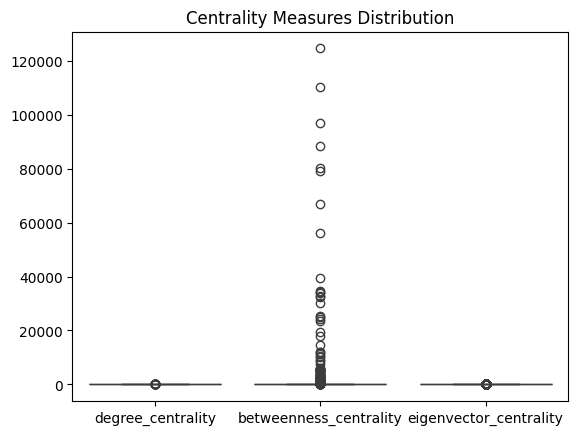

In [19]:
from scipy.stats import zscore

centrality_df['degree_zscore'] = zscore(centrality_df['degree_centrality'])
centrality_df['betweenness_zscore'] = zscore(centrality_df['betweenness_centrality'])
centrality_df['eigenvector_zscore'] = zscore(centrality_df['eigenvector_centrality'])

disproportionate_influence = centrality_df[
    (centrality_df['degree_zscore'] > 3) |
    (centrality_df['betweenness_zscore'] > 3) |
    (centrality_df['eigenvector_zscore'] > 3)
]

centrality_df['influence_score'] = (
    centrality_df['degree_zscore'] +
    centrality_df['betweenness_zscore'] +
    centrality_df['eigenvector_zscore']
)
disproportionate_influence = centrality_df.sort_values(by='influence_score', ascending=False).head(10)

import seaborn as sns

sns.boxplot(data=centrality_df[['degree_centrality', 'betweenness_centrality', 'eigenvector_centrality']])
plt.title('Centrality Measures Distribution')
plt.show()

In [ ]:
##  Graph

# Step 1: Degree Centrality (Compute on Full Graph)
degree_centrality = nx.degree_centrality(user_graph)

# Step 2: Sample Nodes for Betweenness and Eigenvector Centrality
# Define a sampling strategy (e.g., top 10% of nodes by degree centrality)
sampled_nodes = list(degree_centrality.keys())[:1000]  # Sample the first 1000 nodes (adjust as needed)
subgraph = user_graph.subgraph(sampled_nodes)  # Induced subgraph with sampled nodes

# Step 3: Betweenness Centrality (Efficient Computation with iGraph)
# Convert the sampled NetworkX subgraph to iGraph
nx_sampled_graph = nx.convert_node_labels_to_integers(subgraph)  # Ensure compatibility with iGraph
edges = list(nx_sampled_graph.edges())
igraph_sampled_graph = ig.Graph(edges)

# Compute betweenness centrality on the sampled subgraph
betweenness = igraph_sampled_graph.betweenness(directed=False, weights=None)  # Normalized by default
betweenness_dict = {node: value for node, value in zip(subgraph.nodes(), betweenness)}

# Step 4: Eigenvector Centrality (Compute on Sampled Subgraph)
eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)

# Step 5: Combine Results into a DataFrame
# Ensure all centralities are computed on the same set of sampled nodes
centrality_df = pd.DataFrame({
    'node': list(subgraph.nodes()),
    'degree_centrality': [degree_centrality[node] for node in subgraph.nodes()],
    'betweenness_centrality': [betweenness_dict[node] for node in subgraph.nodes()],
    'eigenvector_centrality': [eigenvector_centrality[node] for node in subgraph.nodes()]
})

# Step 6: Save Centrality Results (optional)
centrality_df.to_csv('centrality_metrics_sampled.csv', index=False)

# Step 7: Analyze Influential Nodes
# Sort by degree centrality to find the most connected nodes
top_degree_nodes = centrality_df.sort_values(by='degree_centrality', asce

# Temporal Anomalies

## Temporal Sliding Windows

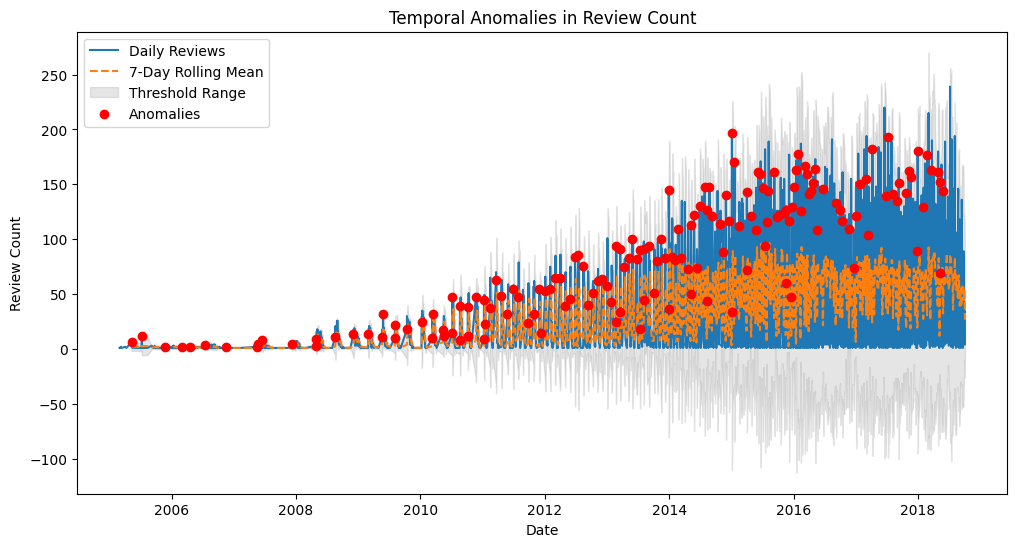

Detected Anomalies:
            date  review_count  rolling_mean  rolling_std  anomaly
6     2005-05-11             6      2.000000     1.825742     True
14    2005-07-10            12      2.714286     4.111540     True
32    2005-11-23             2      1.142857     0.377964     True
61    2006-03-02             2      1.142857     0.377964     True
79    2006-04-19             2      1.142857     0.377964     True
...          ...           ...           ...          ...      ...
2598  2018-03-16           163     38.571429    58.057033     True
2629  2018-04-28           161     48.000000    56.077328     True
2639  2018-05-08            69     14.857143    24.694322     True
2640  2018-05-09           152     34.000000    57.578931     True
2656  2018-05-29           144     37.714286    50.897656     True

[161 rows x 5 columns]


In [8]:
# Step 1: Convert 'date' column to datetime and sort by it
data0['date'] = pd.to_datetime(data0['date'])
data0 = data0.sort_values(by='date')

# Step 2: Group by day and count reviews
daily_reviews = data0.groupby(data0['date'].dt.date).size().reset_index(name='review_count')

# Step 3: Apply a sliding window to compute rolling metrics
window_size = 7  # Sliding window size (e.g., 7 days)
daily_reviews['rolling_mean'] = daily_reviews['review_count'].rolling(window=window_size).mean()
daily_reviews['rolling_std'] = daily_reviews['review_count'].rolling(window=window_size).std()

# Step 4: Identify anomalies (e.g., >2 standard deviations from the rolling mean)
threshold = 2  # Number of standard deviations
daily_reviews['anomaly'] = abs(daily_reviews['review_count'] - daily_reviews['rolling_mean']) > (threshold * daily_reviews['rolling_std'])

# Step 5: Visualize results
plt.figure(figsize=(12, 6))
plt.plot(daily_reviews['date'], daily_reviews['review_count'], label='Daily Reviews')
plt.plot(daily_reviews['date'], daily_reviews['rolling_mean'], label=f'{window_size}-Day Rolling Mean', linestyle='--')
plt.fill_between(daily_reviews['date'],
                 daily_reviews['rolling_mean'] - threshold * daily_reviews['rolling_std'],
                 daily_reviews['rolling_mean'] + threshold * daily_reviews['rolling_std'],
                 color='gray', alpha=0.2, label='Threshold Range')
plt.scatter(daily_reviews['date'][daily_reviews['anomaly']],
            daily_reviews['review_count'][daily_reviews['anomaly']],
            color='red', label='Anomalies', zorder=5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Review Count')
plt.title('Temporal Anomalies in Review Count')
plt.show()

# Step 6: Display anomalies
anomalies = daily_reviews[daily_reviews['anomaly']]
print("Detected Anomalies:")
print(anomalies)

Key Elements:

Daily Review Count (Blue Line):
This shows the raw number of reviews submitted each day.
Spikes in this line indicate sudden increases in activity, which may correspond to events such as promotions, holidays, or unexpected bursts of customer engagement.

Rolling Mean (Orange Line):
The rolling mean smooths the fluctuations to show trends over time.
It helps identify the baseline activity level and the expected review count for a given period.

Threshold Range (Gray Shaded Area):
Represents the expected range of normal activity based on the rolling mean and standard deviation (e.g., ±2 standard deviations).
Data points falling outside this range are flagged as anomalies.

Anomalies (Red Dots):
Points where the review count exceeds the threshold range, indicating unusual spikes in reviews.
These may represent review bursts, which could be caused by promotional events, sudden popularity, or potentially fraudulent activity.

Observations:
Clusters of anomalies suggest periods of sustained unusual activity, such as during events or periods of heightened interest.
Anomalies spread across time could indicate isolated events that differ from typical behavior, warranting further investigation.

Total Anomalies Detected: 161
Peak Anomaly Details:
date            2015-01-04
review_count           197
rolling_mean     34.714286
rolling_std      72.532095
anomaly               True
Name: 1693, dtype: object
Anomalies Count by Year:
date
2005     3
2006     4
2007     4
2008     4
2009     6
2010    12
2011    13
2012    13
2013    21
2014    19
2015    23
2016    17
2017    15
2018     7
dtype: int64


<ipython-input-10-57a3d254e492>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['date'] = pd.to_datetime(anomalies['date'])


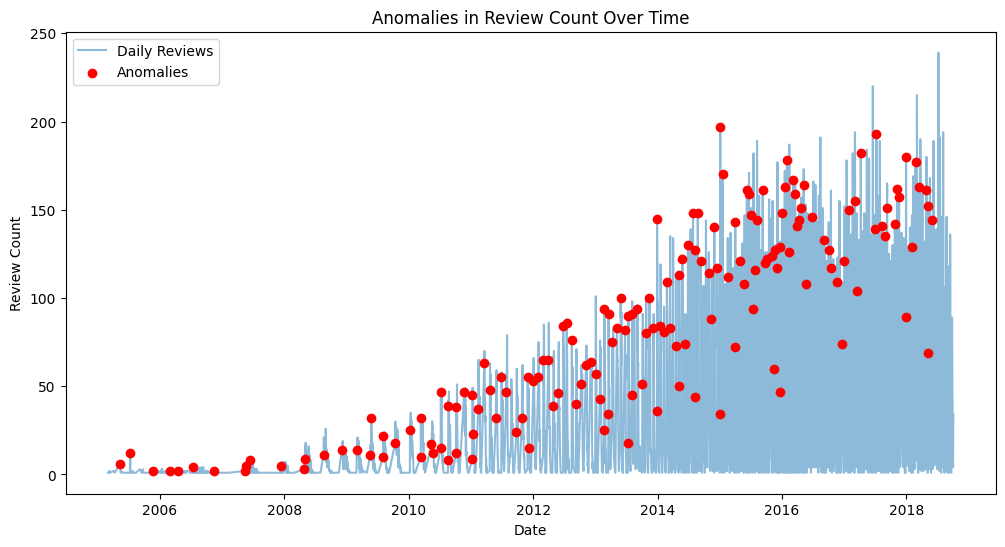

Text Length Statistics for Anomaly Days:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: text_length, dtype: float64
Top 10 Categories on Anomaly Days:
Series([], Name: count, dtype: int64)


In [10]:
# Step 1: Isolate Anomalies
anomalies = daily_reviews[daily_reviews['anomaly']]

# Step 2: Analyze the anomalies
# Count of anomalies
anomaly_count = len(anomalies)
print(f"Total Anomalies Detected: {anomaly_count}")

# Peak anomaly
peak_anomaly = anomalies.loc[anomalies['review_count'].idxmax()]
print("Peak Anomaly Details:")
print(peak_anomaly)

# Time distribution of anomalies
anomalies['date'] = pd.to_datetime(anomalies['date'])
anomalies_by_year = anomalies.groupby(anomalies['date'].dt.year).size()
print("Anomalies Count by Year:")
print(anomalies_by_year)

# Step 3: Plot anomalies for visual inspection
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_reviews['date'], daily_reviews['review_count'], label='Daily Reviews', alpha=0.5)
plt.scatter(anomalies['date'], anomalies['review_count'], color='red', label='Anomalies', zorder=5)
plt.xlabel('Date')
plt.ylabel('Review Count')
plt.title('Anomalies in Review Count Over Time')
plt.legend()
plt.show()

# Step 4: Analyze associated features (if available)
# Example: Analyzing text length for anomaly days
anomaly_dates = anomalies['date'].tolist()
anomaly_reviews = data0[data0['date'].dt.date.isin(anomaly_dates)]

# Text length distribution for anomalies
print("Text Length Statistics for Anomaly Days:")
print(anomaly_reviews['text_length'].describe())

# Additional feature analysis: Categories
category_counts = anomaly_reviews['categories'].value_counts().head(10)
print("Top 10 Categories on Anomaly Days:")
print(category_counts)

 sliding window analysis at the daily level only identifies anomalous days based on aggregated metrics (e.g., total reviews per day). It doesn’t directly pinpoint specific reviews within data0 that caused the anomaly|

In [19]:
data0['date'] = pd.to_datetime(data0['date'], errors='coerce')
# Calculate the total number of unique days
total_days = data0['date'].dt.date.nunique()

# Number of anomalies detected
anomalies_detected = len(anomalies)

# Calculate the percentage of anomalous days
percentage_anomalies = (anomalies_detected / total_days) * 100

print(f"Percentage of anomalous days: {percentage_anomalies:.2f}%")

Percentage of anomalous days: 5.85%
